In [1]:
import os

os.environ["BRASA_DATA_PATH"] = "/mnt/d/brasa"

In [2]:
import sys
sys.path.append('..')

from datetime import datetime

import numpy as np
import pandas as pd
import statsmodels.api as sm
import pyarrow.dataset as ds
import pyarrow.compute as pc
import pyarrow

import brasa

man = brasa.engine.CacheManager()

In [5]:
symbols = ("ELET3", "ELET6")
prices = brasa.get_prices(symbols, start=datetime(2023,1,1), end=datetime(2023, 12, 31))
rets = brasa.get_returns(symbols, start=datetime(2023,1,1), end=datetime(2023, 12, 31))
crets = rets.cumsum()

In [8]:
srets = prices.pct_change().dropna()
pdiff = prices.diff().dropna()

In [4]:
results_prices = sm.OLS(prices[symbols[0]], prices[symbols[1]]).fit()
results_prices.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  ELET3   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.718e+05
Date:                Fri, 12 Apr 2024   Prob (F-statistic):                        0.00
Time:                        06:56:12   Log-Likelihood:                         -435.86
No. Observations:                 248   AIC:                                      873.7
Df Residuals:                     247   BIC:                                      877.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ELET6          0.9223      0.002    414.481      0.000       0.918       0.927
==============================================================================
Omnibus:                       29.752   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.560
Skew:                           0.920   Prob(JB):                     1.15e-08
Kurtosis:                       2.609   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
x = np.exp(crets)
results_prices = sm.OLS(x[symbols[0]], x[symbols[1]]).fit()
results_prices.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  ELET3   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.718e+05
Date:                Fri, 12 Apr 2024   Prob (F-statistic):                        0.00
Time:                        07:01:16   Log-Likelihood:                          490.30
No. Observations:                 248   AIC:                                     -978.6
Df Residuals:                     247   BIC:                                     -975.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ELET6          0.9151      0.002    414.481      0.000       0.911       0.919
==============================================================================
Omnibus:                       29.752   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.560
Skew:                           0.920   Prob(JB):                     1.15e-08
Kurtosis:                       2.609   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
x = (1 + srets).cumprod()
results_prices = sm.OLS(x[symbols[0]], x[symbols[1]]).fit()
results_prices.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  ELET3   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.737e+05
Date:                Fri, 12 Apr 2024   Prob (F-statistic):                        0.00
Time:                        07:00:31   Log-Likelihood:                          481.16
No. Observations:                 247   AIC:                                     -960.3
Df Residuals:                     246   BIC:                                     -956.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ELET6          0.9227      0.002    416.809      0.000       0.918       0.927
==============================================================================
Omnibus:                       29.693   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.937
Skew:                           0.930   Prob(JB):                     9.53e-09
Kurtosis:                       2.643   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
crets = np.log(prices).diff().dropna().cumsum()
results_pdiff = sm.OLS(crets[symbols[0]], crets[symbols[1]]).fit()
results_pdiff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  ELET3   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                          4.572e+04
Date:                Sun, 31 Mar 2024   Prob (F-statistic):                        0.00
Time:                        18:37:55   Log-Likelihood:                          1720.0
No. Observations:                1241   AIC:                                     -3438.
Df Residuals:                    1240   BIC:                                     -3433.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ELET6          1.0416      0.005    213.817      0.000       1.032       1.051
==============================================================================
Omnibus:                      144.719   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.610
Skew:                          -0.974   Prob(JB):                     1.23e-43
Kurtosis:                       2.842   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
results_pdiff = sm.OLS(pdiff[symbols[0]], pdiff[symbols[1]]).fit()
results_pdiff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  ELET3   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                          1.158e+04
Date:                Sun, 31 Mar 2024   Prob (F-statistic):                        0.00
Time:                        18:38:03   Log-Likelihood:                         -200.45
No. Observations:                1241   AIC:                                      402.9
Df Residuals:                    1240   BIC:                                      408.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ELET6          1.0806      0.010    107.599      0.000       1.061       1.100
==============================================================================
Omnibus:                       37.401   Durbin-Watson:                   2.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.475
Skew:                          -0.070   Prob(JB):                     6.14e-20
Kurtosis:                       4.301   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: >

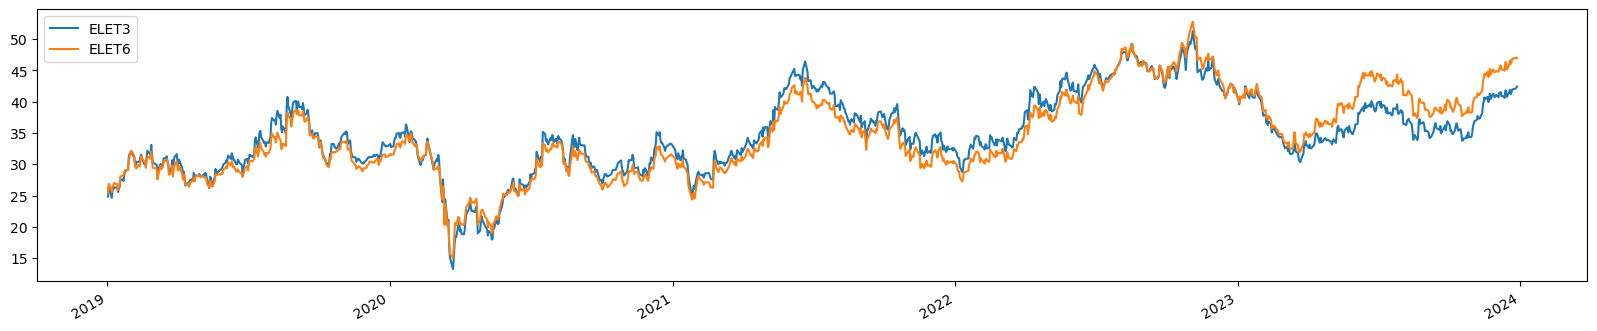

In [9]:
prices.plot(figsize=(20, 4))

In [10]:
(1, results_prices.params.iloc[0])

(1, 1.0016133970036405)

In [11]:
w = (prices.iloc[0,:] * (1, -results_prices.params.iloc[0])).sum()
n = prices.iloc[0,0]/w
W = (prices.iloc[0,:] * (n, - n * results_prices.params.iloc[0])).sum()
(n, - n * results_prices.params.iloc[0])

(-44.88605005710958, 44.958469075776975)

In [12]:
results_prices.params.iloc[0] * prices.iloc[0, 1] / W

1.0222786366527625

<Axes: >

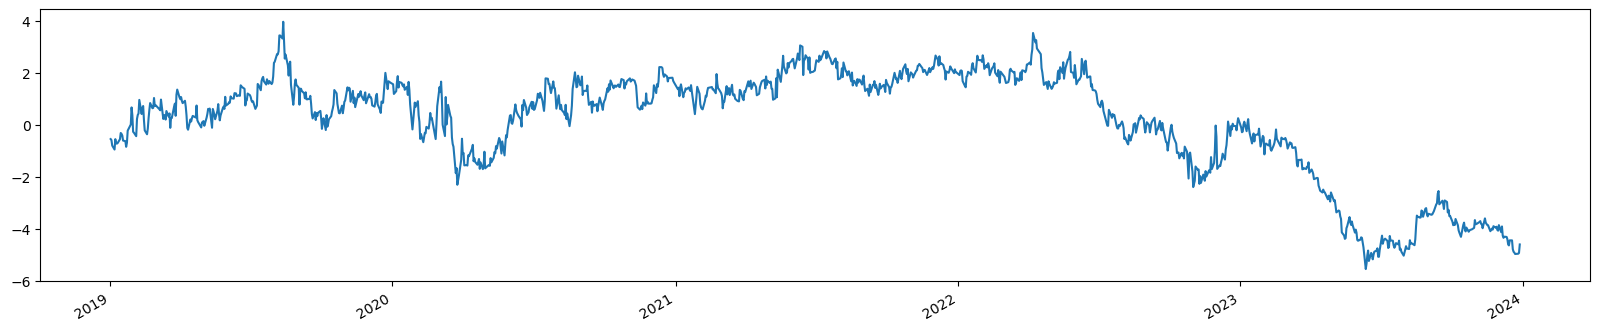

In [13]:
results_prices.resid.plot(figsize=(20, 4))

In [14]:
results_prices.resid.head()

2019-01-02   -0.553774
2019-01-03   -0.594513
2019-01-04   -0.803731
2019-01-07   -0.956058
2019-01-08   -0.556789
dtype: float64

In [15]:
(prices * (1, - results_prices.params.iloc[0])).sum(axis=1).head()

2019-01-02   -0.553774
2019-01-03   -0.594513
2019-01-04   -0.803731
2019-01-07   -0.956058
2019-01-08   -0.556789
dtype: float64

In [16]:
results_prices.resid.diff().dropna().sum()

-4.052220699595534

In [17]:
(prices.diff().dropna() * (1, - results_prices.params.iloc[0])).sum(axis=1).sum()

-4.052220699595537

In [18]:
(results_prices.resid.pct_change().dropna()).head()

2019-01-03    0.073566
2019-01-04    0.351915
2019-01-07    0.189524
2019-01-08   -0.417620
2019-01-09    0.298531
dtype: float64

In [19]:
q1 = prices.iloc[:, 0].shift(1) / results_prices.resid.shift(1)
q2 =  results_prices.params.iloc[0] * prices.iloc[:, 1].shift(1) / results_prices.resid.shift(1)
(q1 * srets.iloc[:, 0] - q2 * srets.iloc[:, 1]).head()

2019-01-02         NaN
2019-01-03    0.073566
2019-01-04    0.351915
2019-01-07    0.189524
2019-01-08   -0.417620
dtype: float64

In [20]:
(1 + results_prices.resid.pct_change().dropna()).prod()

8.317460855692396

In [21]:
q1 = prices.iloc[:, 0].shift(1) / results_prices.resid.shift(1)
q2 =  results_prices.params.iloc[0] * prices.iloc[:, 1].shift(1) / results_prices.resid.shift(1)
(1 + q1 * srets.iloc[:, 0] - q2 * srets.iloc[:, 1]).dropna().prod()

8.317460855699467

<Axes: >

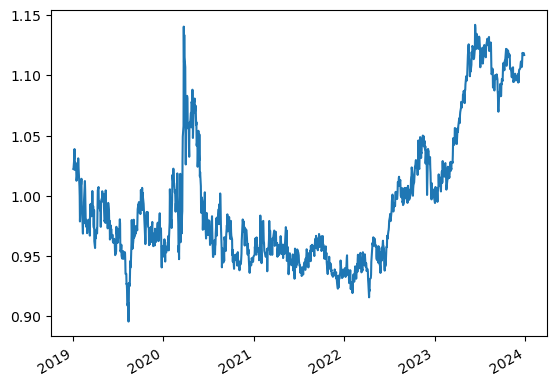

In [22]:
(q2 / q1).plot()